<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_0_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.497451,50.341023,0.745285,125.583759,124.892046,0.691713
1,0.0,1.0,38.682329,41.096302,0.117128,89.895758,89.863170,0.032589
2,0.0,2.0,29.404417,50.588192,-0.343584,89.649025,90.068560,-0.419534
3,0.0,3.0,85.967678,82.758674,0.098390,178.824742,178.716117,0.108625
4,0.0,4.0,83.894354,84.063867,-0.050516,177.907706,177.947323,-0.039617
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,39.150744,33.983917,0.325762,83.460422,83.308574,0.151849
59996,999.0,56.0,44.476548,30.991467,0.182012,85.650027,85.653006,-0.002979
59997,999.0,57.0,75.880234,94.694743,-0.178379,180.396598,180.636368,-0.239769
59998,999.0,58.0,29.257969,53.810582,0.508604,93.577155,93.188751,0.388404


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.497451,50.341023,0.745285,125.583759,124.892046,0.691713
1,0.0,1.0,38.682329,41.096302,0.117128,89.895758,89.863170,0.032589
2,0.0,2.0,29.404417,50.588192,-0.343584,89.649025,90.068560,-0.419534
3,0.0,3.0,85.967678,82.758674,0.098390,178.824742,178.716117,0.108625
4,0.0,4.0,83.894354,84.063867,-0.050516,177.907706,177.947323,-0.039617
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,39.150744,33.983917,0.325762,83.460422,83.308574,0.151849
59996,999.0,56.0,44.476548,30.991467,0.182012,85.650027,85.653006,-0.002979
59997,999.0,57.0,75.880234,94.694743,-0.178379,180.396598,180.636368,-0.239769
59998,999.0,58.0,29.257969,53.810582,0.508604,93.577155,93.188751,0.388404


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    64.497451  50.341023  0.745285  125.583759  124.892046  0.691713
      1.0    38.682329  41.096302  0.117128   89.895758   89.863170  0.032589
      2.0    29.404417  50.588192 -0.343584   89.649025   90.068560 -0.419534
      3.0    85.967678  82.758674  0.098390  178.824742  178.716117  0.108625
      4.0    83.894354  84.063867 -0.050516  177.907706  177.947323 -0.039617
...                ...        ...       ...         ...         ...       ...
999.0 55.0   39.150744  33.983917  0.325762   83.460422   83.308574  0.151849
      56.0   44.476548  30.991467  0.182012   85.650027   85.653006 -0.002979
      57.0   75.880234  94.694743 -0.178379  180.396598  180.636368 -0.239769
      58.0   29.257969  53.810582  0.508604   93.577155   93.188751  0.388404
      59.0   31.298091  48.981603 -0.494717   89.784977   90.412690 -0.627713

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    64.497451  50.341023  0.745285  125.583759  124.892046  0.691713
      1.0    38.682329  41.096302  0.117128   89.895758   89.863170  0.032589
      2.0    29.404417  50.588192 -0.343584   89.649025   90.068560 -0.419534
      3.0    85.967678  82.758674  0.098390  178.824742  178.716117  0.108625
      4.0    83.894354  84.063867 -0.050516  177.907706  177.947323 -0.039617
...                ...        ...       ...         ...         ...       ...
999.0 55.0   39.150744  33.983917  0.325762   83.460422   83.308574  0.151849
      56.0   44.476548  30.991467  0.182012   85.650027   85.653006 -0.002979
      57.0   75.880234  94.694743 -0.178379  180.396598  180.636368 -0.239769
      58.0   29.257969  53.810582  0.508604   93.577155   93.188751  0.388404
      59.0   31.298091  48.981603 -0.494717   89.784977   90.412690 -0.627713

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.497451,50.341023,0.745285,125.583759,124.892046,0.691713
1,0.0,1.0,38.682329,41.096302,0.117128,89.895758,89.863170,0.032589
2,0.0,2.0,29.404417,50.588192,-0.343584,89.649025,90.068560,-0.419534
3,0.0,3.0,85.967678,82.758674,0.098390,178.824742,178.716117,0.108625
4,0.0,4.0,83.894354,84.063867,-0.050516,177.907706,177.947323,-0.039617
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,39.150744,33.983917,0.325762,83.460422,83.308574,0.151849
59996,999.0,56.0,44.476548,30.991467,0.182012,85.650027,85.653006,-0.002979
59997,999.0,57.0,75.880234,94.694743,-0.178379,180.396598,180.636368,-0.239769
59998,999.0,58.0,29.257969,53.810582,0.508604,93.577155,93.188751,0.388404


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    64.497451  50.341023  0.745285  125.583759  124.892046  0.691713
      1.0    38.682329  41.096302  0.117128   89.895758   89.863170  0.032589
      2.0    29.404417  50.588192 -0.343584   89.649025   90.068560 -0.419534
      3.0    85.967678  82.758674  0.098390  178.824742  178.716117  0.108625
      4.0    83.894354  84.063867 -0.050516  177.907706  177.947323 -0.039617
...                ...        ...       ...         ...         ...       ...
999.0 55.0   39.150744  33.983917  0.325762   83.460422   83.308574  0.151849
      56.0   44.476548  30.991467  0.182012   85.650027   85.653006 -0.002979
      57.0   75.880234  94.694743 -0.178379  180.396598  180.636368 -0.239769
      58.0   29.257969  53.810582  0.508604   93.577155   93.188751  0.388404
      59.0   31.298091  48.981603 -0.494717   89.784977   90.412690 -0.627713

[60000 rows x 6 columns]

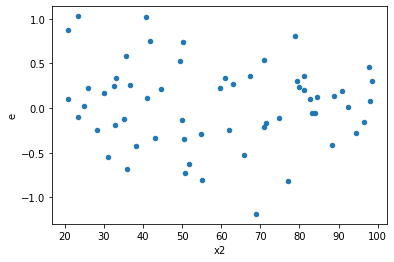

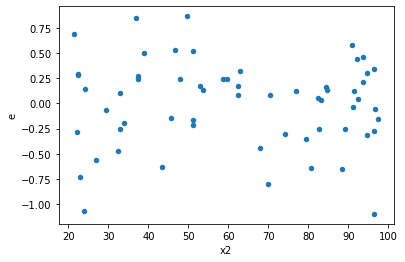

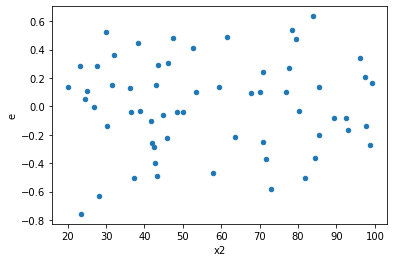

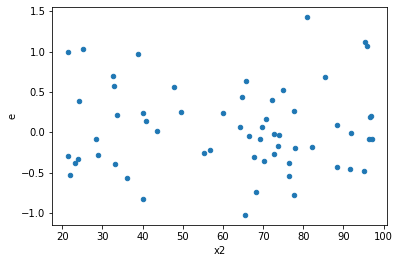

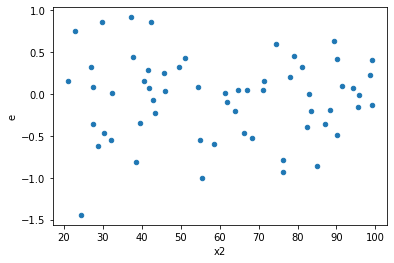

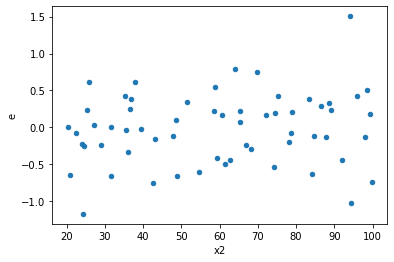

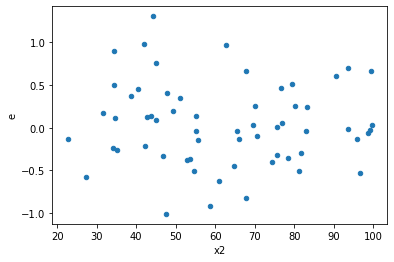

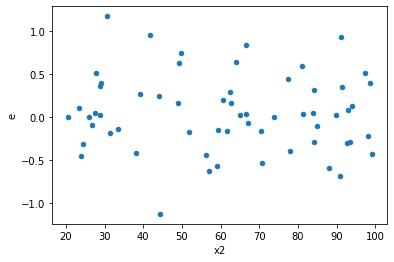

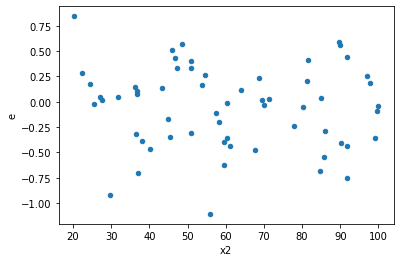

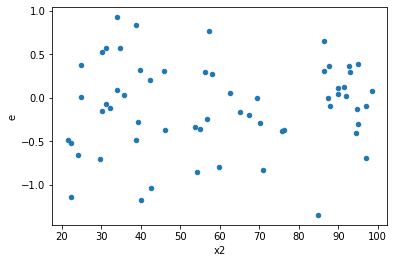

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,22.0,22.0,6.1498207431001,6.6577439882565415,0.27953730650455,0.3026247267389337,1.0825915528881578,0.854025715076036,0.572987142461982,0.427012857538018,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,4.282373647651962,6.542906680892123,0.19465334762054373,0.2974048491314601,1.5278691723875184,0.3274592474874398,0.8362703762562801,0.1637296237437199,Reject001=1 : Homoscedasticity
13.0,22.0,22.0,3.127390674537386,3.2186601396996295,0.1421541215698812,0.14630273362271043,1.0291839027037273,0.9468209568455768,0.5265895215772116,0.4734104784227884,Reject001=1 : Homoscedasticity
20.0,22.0,22.0,2.3371322158512773,3.1652749630637778,0.10623328253869442,0.14387613468471716,1.3543414196234753,0.48269347768832893,0.7586532611558355,0.24134673884416447,Reject001=1 : Homoscedasticity
24.0,22.0,22.0,4.939856674758712,5.213913072380822,0.22453893976175962,0.23699604874458283,1.0554786131797027,0.9003730673975503,0.5498134663012249,0.45018653369877515,Reject001=1 : Homoscedasticity
31.0,22.0,22.0,2.700521915551736,4.02260992979427,0.12275099616144254,0.18284590589973956,1.4895675930748455,0.3570599579829732,0.8214700210085134,0.1785299789914866,Reject001=1 : Homoscedasticity
38.0,22.0,22.0,3.7955012171343085,4.941073821036696,0.17252278259701403,0.2245942645925771,1.3018238009596321,0.54138059403948,0.72930970298026,0.27069029701974,Reject001=1 : Homoscedasticity
41.0,22.0,22.0,4.044592019153777,4.704302480618408,0.18384509177971714,0.21383193093720038,1.1631092724162222,0.7261988176891254,0.6369005911554373,0.3630994088445627,Reject001=1 : Homoscedasticity
42.0,22.0,22.0,3.562967659595027,3.8189904275490414,0.1619530754361376,0.1735904739795019,1.071856607304461,0.8721838308600436,0.5639080845699782,0.4360919154300218,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,5.075981782689952,3.813743122330232,0.23072644466772507,0.17335196010591963,0.7513311287553888,0.5080795185288985,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,4.879354995040948,3.1058397155002218,0.22178886341095216,0.14117453252273734,0.6365266963885167,0.2969110475811267,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,2.6019632146676934,2.3726480393402314,0.11827105521216788,0.1078476381518287,0.9118684022761064,0.8306355847782017,Reject001=1 : Homoscedasticity
3.0,22.0,22.0,6.1498207431001,6.6577439882565415,0.27953730650455,0.3026247267389337,1.0825915528881578,0.854025715076036,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,7.008658406632331,4.319490642454781,0.3185753821196514,0.19634048374794458,0.6163077713085893,0.26402160215849463,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,4.282373647651962,6.542906680892123,0.19465334762054373,0.2974048491314601,1.5278691723875184,0.3274592474874398,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,6.488746649454475,2.900482018188683,0.29494302952065793,0.1318400917358492,0.44700189033155324,0.06533513834344336,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,5.629517058802265,3.785750073812547,0.2558871390364666,0.17207954880966123,0.6724822101556972,0.3591093608965696,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,3.3679101002178466,3.2941700086786736,0.15308682273717486,0.14973500039448517,0.9781050891072172,0.9590612650052613,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      963
Reject001=0 : Heteroscedasticity     37
Name: Result_test, dtype: int64